<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#한글-font-설정하기" data-toc-modified-id="한글-font-설정하기-1">한글 font 설정하기</a></span></li><li><span><a href="#NLTK-(계속)" data-toc-modified-id="NLTK-(계속)-2">NLTK (계속)</a></span><ul class="toc-item"><li><span><a href="#Text-:-토큰-분석" data-toc-modified-id="Text-:-토큰-분석-2.1">Text : 토큰 분석</a></span><ul class="toc-item"><li><span><a href="#nltk.Text-한글-적용" data-toc-modified-id="nltk.Text-한글-적용-2.1.1">nltk.Text 한글 적용</a></span></li><li><span><a href="#Naver-뉴스기사에서-Text-사용하기" data-toc-modified-id="Naver-뉴스기사에서-Text-사용하기-2.1.2">Naver 뉴스기사에서 Text 사용하기</a></span></li></ul></li></ul></li><li><span><a href="#n-gram" data-toc-modified-id="n-gram-3">n-gram</a></span><ul class="toc-item"><li><span><a href="#Ngram-함수-정의" data-toc-modified-id="Ngram-함수-정의-3.1">Ngram 함수 정의</a></span></li><li><span><a href="#naver-경제-뉴스-1건-ngram" data-toc-modified-id="naver-경제-뉴스-1건-ngram-3.2">naver 경제 뉴스 1건 ngram</a></span></li><li><span><a href="#naver-경제-뉴스-10건-ngram" data-toc-modified-id="naver-경제-뉴스-10건-ngram-3.3">naver 경제 뉴스 10건 ngram</a></span></li><li><span><a href="#영문-소설-ngram" data-toc-modified-id="영문-소설-ngram-3.4">영문 소설 ngram</a></span></li></ul></li><li><span><a href="#WPM(Word-Piece-Model)" data-toc-modified-id="WPM(Word-Piece-Model)-4">WPM(Word Piece Model)</a></span></li><li><span><a href="#Empirical-Law-(경험적으로-알게된-법칙)" data-toc-modified-id="Empirical-Law-(경험적으로-알게된-법칙)-5">Empirical Law (경험적으로 알게된 법칙)</a></span><ul class="toc-item"><li><span><a href="#Zipf's-Law" data-toc-modified-id="Zipf's-Law-5.1">Zipf's Law</a></span><ul class="toc-item"><li><span><a href="#법률-corpus" data-toc-modified-id="법률-corpus-5.1.1">법률 corpus</a></span></li><li><span><a href="#gutenberg-corpus" data-toc-modified-id="gutenberg-corpus-5.1.2">gutenberg corpus</a></span></li><li><span><a href="#naver-뉴스-기사-corpus" data-toc-modified-id="naver-뉴스-기사-corpus-5.1.3">naver 뉴스 기사 corpus</a></span></li></ul></li><li><span><a href="#Heap's-Law" data-toc-modified-id="Heap's-Law-5.2">Heap's Law</a></span></li></ul></li></ul></div>

## 한글 font 설정하기

In [3]:
from matplotlib import font_manager, rc

In [4]:
# MAC : /Library/Fonts/AppleGothic.ttf
# Windows : c:\windows\fonts\gulim.ttc
path = "/Library/Fonts/AppleGothic.ttf"

In [5]:
family = font_manager.FontProperties(fname=path).get_name()
rc("font", family=family)

## NLTK (계속)

In [6]:
from nltk.corpus import gutenberg, brown

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()

In [9]:
len(corpus), len(sent_tokenize(corpus)), len(word_tokenize(corpus))

(887071, 7493, 191785)

### Text : 토큰 분석

- 텍스트의 초기 탐색을 지원하기 위한 (string) tokens의 wrapper 입니다.
- 테스트의 contexts에 대한 다양한 분석을 수행하는 메서드를 지원 합니다.

In [10]:
from nltk import Text

In [11]:
tokens = word_tokenize(corpus)
t = Text(tokens)

In [12]:
type(t)

nltk.text.Text

In [13]:
len(t), len(set(t))

(191785, 8406)

In [14]:
t.vocab().most_common(20)    # 많이 나타난 token과 횟수

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452),
 ('was', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('in', 2103),
 ('it', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729)]

- 빈도가 높은 token 중에 중요하지 않은 것들도 많이 있음. 걸러내야 함

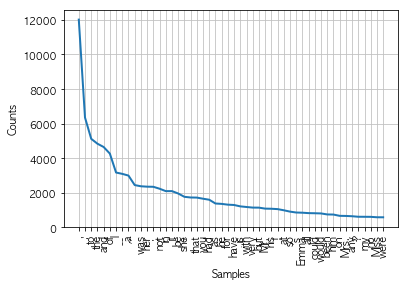

In [16]:
t.plot(50)

In [17]:
t.similar("emma")

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


#### nltk.Text 한글 적용

In [18]:
from konlpy.corpus import kolaw

In [19]:
kcorpus = kolaw.open(kolaw.fileids()[0]).read()
k_tokens = word_tokenize(kcorpus)
kt = Text(k_tokens)

In [20]:
len(kt), len(set(kt))

(4640, 2023)

In [21]:
kt.vocab().most_common(30)

[('.', 357),
 (',', 101),
 ('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('모든', 30),
 ('법률로', 30),
 ('정한다', 28),
 ('위하여', 26),
 ('가진다', 25),
 ('아니한다', 25),
 ('및', 25),
 ('이', 24),
 ('국회의', 23),
 ('필요한', 21),
 ('없다', 21),
 ('기타', 21),
 ('대통령은', 19),
 ('하며', 18),
 ('헌법에', 17)]

- word_tokenize로는 "법률이", "법률로" 등 중복된 내용이 분석되지 않음

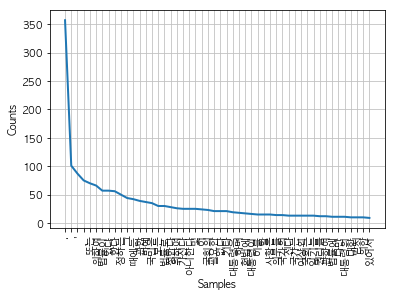

In [22]:
kt.plot(50)

- 영어와 한글의 빈도 패턴이 비슷함

In [23]:
# 특정 token의 빈도 수를 확인하기
t.count("Emma"), t.count("of")

(855, 4272)

- 빈도 수는 "of"가 "Emma" 보다 높지만, 중요도는 "Emma"(주인공 이름)가 훨씬 중요할 수 있음을 알아야 함

In [24]:
kt.count("국민"), kt.count("국회")

(2, 1)

In [25]:
t.concordance("Emma")    # Emma가 어느 위치에 나왔는지 해당 라인들을 보여줌

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

In [26]:
kt.concordance("국민")

Displaying 2 of 2 matches:
민족문화의 창달에 노력하여 대통령으로서의 직책을 성실히 수행할 것을 국민 앞에 엄숙히 선서합니다 . '' 제70조 대통령의 임기는 5년으로 
위탁경영은 법률이 정하는 바에 의하여 인정된다 . 제122조 국가는 국민 모두의 생산 및 생활의 기반이 되는 국토의 효율적이고 균형있는 이용


In [27]:
t.similar("Emma")

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


- 유사한 단어를 찾은 결과로 보면, 사람을 지칭한다는 것을 유추할 수 있음
- similar() 결과는 모두 소문자 (대문자도 모두 소문자로 변환해서 보여줌)

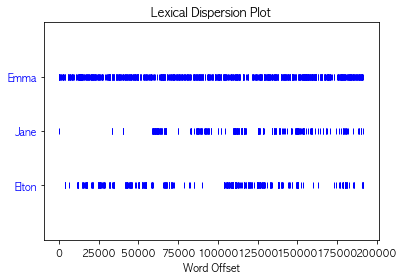

In [28]:
t.dispersion_plot(["Emma", "Jane", "Elton"])   # 해당 token이 나타난 위치 

In [29]:
kt.similar("헌법")

상호원조 국무총리


#### Naver 뉴스기사에서 Text 사용하기

In [30]:
# naver 뉴스기사 (path : ../뉴스/*.txt,  또는 ../naver_news/일시/*.txt 등)  : 본인이 저장한 path
# import os
# path = "./naver_news/2019-03-19_13-08/"
# fileList = [file for file in os.listdir(path)
#                         if file.startswith("경제") and file.endswith(".txt")]

In [31]:
# for file in fileList
# corpus = ""
# with open(path+ "/" + fileList[0]) as fp:
#     news += fp.read()

In [32]:
from functions.naver import NewsScraping

news = NewsScraping()
corpus = news.get_articles("경제")

In [33]:
newsT = Text(word_tokenize(corpus))
len(newsT), len(set(newsT))

(3925, 2206)

In [34]:
newsT.vocab().most_common(30)

[('.', 157),
 ('(', 57),
 (')', 57),
 (',', 57),
 ('%', 52),
 ("''", 41),
 ('``', 37),
 ("'", 27),
 ('있다', 25),
 ('[', 22),
 (']', 22),
 ('수', 22),
 ('고', 19),
 ('전', 17),
 ('등', 17),
 ('이', 16),
 ('기자', 15),
 ('“', 15),
 ('”', 15),
 ('서울', 13),
 ('며', 13),
 ('@', 12),
 ('공매', 12),
 ('21일', 11),
 ('지난', 11),
 ('대한', 10),
 ('한', 10),
 ('분양권', 10),
 ('지난해', 10),
 ('아파트', 10)]

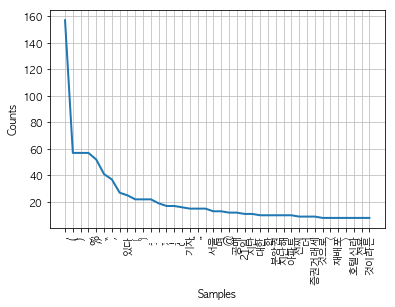

In [35]:
newsT.plot(40)

## n-gram

- 앞에 나온 문자를 기반으로 다음에 올 문자 예측 : Contiguous sequence of n items from a given sample of text or speech
- n-gram을 이용해 단어의 chunk를 만들어서 새로운 단어처럼 사용 합니다.(어절 단위 n-gram)
- n-gram 언어 모델은 카운트에 기반한 통계적 접근을 사용 합니다.

![ngram](./images/ngram.png)

- 확률을 계산하고 싶은 문장이 길어질수록, 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높고, <br>
   카운트할 수 없을 가능성이 높습니다. <br>
   그런데 마르코프의 가정을 사용하면 카운트를 할 수 있을 가능성이 높아집니다. (1st Markov Assumption)
- 단어의 확률을 구할 때, 앞 단어 중 임의의 개수만 포함해서 세보자는 것입니다. <br>
   그러면, 갖고있는 코퍼스에서도 해당 단어의 나열을 카운트할 확률이 높아집니다.
- n-gram은 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법 입니다. <br>
   이때 일부 단어를 몇 개 보느냐를 n으로 정의 합니다.

### Ngram 함수 정의

In [36]:
# 어절 단위의 ngram (n=2)
def ngramEojeol(sentence, n=2):
    '''
    입력: 단어1, 단어2, 단어3, 단어4 : 4
    출력(2) : 단어12, 단어23, 단어34 : 3 - n + 1
    출력(3) : 단어123, 단어234         : 2 - n + 1
    '''
    tokens = sentence.split()
    ngram = []
    
    for i in range(len(tokens) - n + 1):
        ngram.append(" ".join(tokens[i:i+n]))    # 공백을 추가해줘야 단어 사이가 구분됨
        
    return ngram

ngramEojeol("동해물과 백두산이 마르고 닳도록")

['동해물과 백두산이', '백두산이 마르고', '마르고 닳도록']

In [37]:
# 음절 단위의 ngram (n=2)
def ngramUmjeol(term, n=2):
    '''
    입력: 음절1, 음절2, 음절3, 음절4 : 4
    출력(2) : 음절12, 음절23, 음절34 : 3 - n + 1
    출력(3) : 음절123, 음절234         : 2 - n + 1
    '''
    ngram = []
    
    for i in range(len(term) - n + 1):
        ngram.append("".join(term[i:i+n]))    # 공백 없이 붙여서 단어를 만듦
        
    return ngram

ngramUmjeol("국민의국민을국민에")

['국민', '민의', '의국', '국민', '민을', '을국', '국민', '민에']

### naver 경제 뉴스 1건 ngram

In [1]:
from functions.nlp import ngram

ngram.ngramEojeol("동해물과 백두산이 마르고 닳도록")

['동해물과 백두산이', '백두산이 마르고', '마르고 닳도록']

In [2]:
ngram.ngramUmjeol("국민의국민을국민에,...")

['국민', '민의', '의국', '국민', '민을', '을국', '국민', '민에']

In [3]:
from functions.naver import NewsScraping

corpus = NewsScraping().get_articles("경제")

In [4]:
# 네이버 뉴스 bigram
from nltk import Text
bigram = Text(ngram.ngramEojeol(corpus, 2))

In [5]:
len(bigram), len(set(bigram)), bigram.vocab().most_common(20)

(3870,
 3624,
 [('2017년 기준', 8),
  ('등 4대', 5),
  ('한다고 생각하는', 4),
  ('뿌리·섬유 등', 4),
  ('4대 서비스로봇', 4),
  ('기자 홍남기', 4),
  ('홍남기 경제부총리', 4),
  ('경제부총리 겸', 4),
  ('겸 기획재정부', 4),
  ('것으로 나타났다', 4),
  ('2018 한국의', 4),
  ('월평균 임금은', 4),
  ('한국의 사회지표', 3),
  ('22일 발표한', 3),
  ('결혼을 해야', 3),
  ('해야 한다고', 3),
  ('같은 기간', 3),
  ('엘리엇이 제안한', 3),
  ('홈에서 연합뉴스', 3),
  ('연합뉴스 채널', 3)])

In [6]:
bigram = Text(ngram.ngramUmjeol(corpus, 3))

In [7]:
len(bigram), len(set(bigram)), bigram.vocab().most_common(20)

(17578,
 9327,
 [('   ', 127),
  ('\n\n\n', 79),
  ('으로 ', 78),
  (' 20', 59),
  ('다  ', 51),
  ('201', 48),
  ('했다 ', 48),
  ('고 있', 46),
  ('에서 ', 46),
  ('다고 ', 39),
  (' 현대', 37),
  ('보다 ', 36),
  ('지만 ', 33),
  ('하고 ', 32),
  (' 있다', 31),
  ('하는 ', 31),
  (' 지난', 28),
  ('지난해', 26),
  (' 등 ', 26),
  ('현대차', 26)])

### naver 경제 뉴스 10건 ngram

In [8]:
import os
from nltk.tokenize import word_tokenize
from nltk import Text

In [18]:
# path = "./naver_news/2019-03-14_21-51/"
# fileList = [file for file in os.listdir(path)
#                         if file.startswith("경제") and file.endswith(".txt")]
# news = ""
# for f in fileList:
#     with open(path+ "/" + f) as fp:
#         news += fp.read() + "\n"

# newsT = Text(word_tokenize(news))
# len(newsT), len(set(newsT)), newsT.vocab().most_common(30)

In [10]:
import re
from string import punctuation
from functions.naver import NewsScraping

corpus = NewsScraping().get_articles("경제")

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
corpus = pattern.sub("", corpus)

newsT = Text(word_tokenize(corpus))
len(newsT), len(set(newsT)), newsT.vocab().most_common(20)

(3871,
 2576,
 [('등', 26),
  ('지난해', 18),
  ('이상', 17),
  ('대한', 16),
  ('기준', 16),
  ('게', 15),
  ('2017년', 14),
  ('기자', 13),
  ('반면', 12),
  ('22일', 12),
  ('것으로', 12),
  ('현대차', 12),
  ('수', 12),
  ('있다', 11),
  ('가장', 11),
  ('라면', 11),
  ('중', 10),
  ('있는', 10),
  ('소득', 10),
  ('2년', 9)])

In [11]:
bigram = Text(ngram.ngramEojeol(corpus, 2))
len(bigram), len(set(bigram)), bigram.vocab().most_common(20)

(3870,
 3624,
 [('2017년 기준', 8),
  ('등 4대', 5),
  ('한다고 생각하는', 4),
  ('뿌리·섬유 등', 4),
  ('4대 서비스로봇', 4),
  ('기자 홍남기', 4),
  ('홍남기 경제부총리', 4),
  ('경제부총리 겸', 4),
  ('겸 기획재정부', 4),
  ('것으로 나타났다', 4),
  ('2018 한국의', 4),
  ('월평균 임금은', 4),
  ('한국의 사회지표', 3),
  ('22일 발표한', 3),
  ('결혼을 해야', 3),
  ('해야 한다고', 3),
  ('같은 기간', 3),
  ('엘리엇이 제안한', 3),
  ('홈에서 연합뉴스', 3),
  ('연합뉴스 채널', 3)])

In [13]:
bigram = Text(ngram.ngramUmjeol(corpus, 3))
len(bigram), len(set(bigram)), bigram.vocab().most_common(20)

(17578,
 9327,
 [('   ', 127),
  ('\n\n\n', 79),
  ('으로 ', 78),
  (' 20', 59),
  ('다  ', 51),
  ('201', 48),
  ('했다 ', 48),
  ('고 있', 46),
  ('에서 ', 46),
  ('다고 ', 39),
  (' 현대', 37),
  ('보다 ', 36),
  ('지만 ', 33),
  ('하고 ', 32),
  (' 있다', 31),
  ('하는 ', 31),
  (' 지난', 28),
  ('지난해', 26),
  (' 등 ', 26),
  ('현대차', 26)])

### 영문 소설 ngram

In [14]:
# tokens = word_tokenize(corpus)
# t = Text(tokens)
from nltk.corpus import gutenberg, brown

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
bigram = Text(ngram.ngramEojeol(corpus, 3))
len(bigram), len(set(bigram)), bigram.vocab().most_common(30)

(158268,
 132042,
 [('I do not', 123),
  ('I am sure', 97),
  ('a great deal', 62),
  ('I can not', 61),
  ('would have been', 58),
  ('do not know', 52),
  ('she could not', 50),
  ('I dare say', 47),
  ('in the world', 46),
  ('it would be', 45),
  ('could not be', 45),
  ('she had been', 44),
  ('Mr Frank Churchill', 41),
  ('I assure you', 41),
  ('Mr and Mrs', 38),
  ('it was not', 36),
  ('as well as', 36),
  ('Emma could not', 34),
  ('I have been', 34),
  ('was to be', 34),
  ('would not have', 33),
  ('that he had', 33),
  ('I have no', 33),
  ('and Mrs Weston', 33),
  ('I could not', 32),
  ('it will be', 32),
  ('ought to be', 31),
  ('on the subject', 30),
  ('in love with', 30),
  ('I have not', 30)])

In [15]:
bigram = Text(ngram.ngramUmjeol(corpus, 4))
len(bigram), len(set(bigram)), bigram.vocab().most_common(20)

(848806,
 31000,
 [(' the', 6263),
  ('and ', 4820),
  ('the ', 4699),
  (' to ', 4510),
  ('ing ', 4112),
  (' of ', 3694),
  (' and', 3488),
  ('her ', 3058),
  (' her', 2694),
  ('hat ', 2282),
  ('was ', 2276),
  (' not', 2255),
  (' was', 2228),
  (' you', 2163),
  ('not ', 2121),
  ('ould', 2033),
  (' tha', 1936),
  ('uld ', 1873),
  (' in ', 1825),
  ('ther', 1774)])

## WPM(Word Piece Model)

- WPM : 하나의 단어를 내부 단어(Subword Unit)들로 분리하는 단어 분리 모델
- BPE : Byte Pair Encoding (Digram Coding) -> Simple form of data compression

각 음절 <- whitespace(' '), 공백이 나오면 '_'  추가

각 단어의 끝에 <= `</w>` 추가

데이터: 각 단어의 빈도

1. 음절을 쪼개기
1. 패턴을 만들기 (n=2)
1. 빈도가 가장 높은 best case 1개 찾기
1. 병합
1. 2번 부터 반복(n)

In [37]:
# 모든 문자를 공백으로 분리, 단어의 시작에는 <w> 추가, 단어의 끝에는 </w> 추가
# 원래 공백은 "_"로 대체, 원래 "_"를 구분하기 위해 원래 "_"를 "__"(두개)로 대체
def split_terms(term):
    termLists = term.split()
    result = []
    for termList in termLists:
        result.append((" ".join(['<w>']+list(termList)+['</w>'])).replace("_", "__"))
    return " _ ".join(result)

In [38]:
split_terms("lower low_est")

'<w> l o w e r </w> _ <w> l o w __ e s t </w>'

In [39]:
# key: 공백으로 분리된 문자(split_terms), value: 해당 문자가 나타난 횟수
data = {
    split_terms("low"):5,
    split_terms("lowest"):2,
    split_terms("newer"):6,
    split_terms("wider"):3
}

In [68]:
from collections import defaultdict

def find_ngram(tokens, n=2):
    if n < 2:
        print("n 값은 2 이상 이어야 합니다. (일반적으로, 2~4의 값 선택)")
        return None
    
    result = defaultdict(int)    # {}  : dictionary 객체 생성
    
    for k, v in tokens.items():
        term = k.split()
        
        for i in range(len(term) - n + 1):
            ngram = tuple(term[i:i+n])
            # n=2 : (<w>, l), (l, o), (o, w), (w, </w>)
            # n=3 : (<w>, l, o), (l, o, w), (o, w, </w>)
            
            if ngram in result.keys():
                result[ngram] += v
            else:
                result[ngram] = v
    return result

In [71]:
find_ngram(data, 3)

defaultdict(int,
            {('<w>', 'l', 'o'): 7,
             ('l', 'o', 'w'): 7,
             ('o', 'w', '</w>'): 5,
             ('o', 'w', 'e'): 2,
             ('w', 'e', 's'): 2,
             ('e', 's', 't'): 2,
             ('s', 't', '</w>'): 2,
             ('<w>', 'n', 'e'): 6,
             ('n', 'e', 'w'): 6,
             ('e', 'w', 'e'): 6,
             ('w', 'e', 'r'): 6,
             ('e', 'r', '</w>'): 9,
             ('<w>', 'w', 'i'): 3,
             ('w', 'i', 'd'): 3,
             ('i', 'd', 'e'): 3,
             ('d', 'e', 'r'): 3})

In [67]:
pattern =  find_ngram(data, 3)

maxKey = None
maxVal = 0

for k, v in pattern.items():
    if v > maxVal:
        maxVal = v
        maxKey = k

print(maxKey, maxVal)

('e', 'r', '</w>') 9


In [76]:
pattern =  find_ngram(data, 3)

maxKey = None
maxVal = 0

# 방법1
# for k, v in pattern.items():
#     if v > maxVal:
#         maxVal = v
#         maxKey = k
# print(maxKey, maxVal)

# 방법2
# maxKey = max(pattern, key=lambda x: pattern[x])

# 방법3
# maxKey = max(pattern, key=lambda x: pattern.get(x))

# 방법4
maxKey = max(pattern, key=pattern.get)

print(maxKey, pattern[maxKey])

('e', 'r', '</w>') 9


In [77]:
import re

def merge_ngram(maxKey, data):
    result = defaultdict(int)
    
    token = " ".join(maxKey)
    # re.compile(r"(?!=\S)")      # whitespace가 아닌 것 (대문자 S)
    pattern = re.compile(r"(?!=\S)" + token + "(?!\S)")
    
    for k, v in data.items():
        new = pattern.sub("".join(maxKey), k)
        result[new] = v
        
    return result

In [88]:
data = {
    split_terms("low"):5,
    split_terms("lowest"):2,
    split_terms("newer"):6,
    split_terms("wider"):3
}

for i in range(5):
    pattern = find_ngram(data, 3)
    
    maxKey = max(pattern, key=pattern.get)
    
    data = merge_ngram(maxKey, data)
    
    print(maxKey)
    print(data)

('e', 'r', '</w>')
defaultdict(<class 'int'>, {'<w> l o w </w>': 5, '<w> l o w e s t </w>': 2, '<w> n e w er</w>': 6, '<w> w i d er</w>': 3})
('<w>', 'l', 'o')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w> n e w er</w>': 6, '<w> w i d er</w>': 3})
('<w>', 'n', 'e')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w>ne w er</w>': 6, '<w> w i d er</w>': 3})
('<w>ne', 'w', 'er</w>')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w>newer</w>': 6, '<w> w i d er</w>': 3})
('<w>lo', 'w', '</w>')
defaultdict(<class 'int'>, {'<w>low</w>': 5, '<w>lo w e s t </w>': 2, '<w>newer</w>': 6, '<w> w i d er</w>': 3})


In [90]:
from functions.nlp import wpm

wpm.split_terms("lower low_est")

'<w> l o w e r </w> _ <w> l o w __ e s t </w>'

In [94]:
data = {
    split_terms("low"):5,
    split_terms("lowest"):2,
    split_terms("newer"):6,
    split_terms("wider"):3
}

wpm.find_ngram(data, 3)

defaultdict(int,
            {('<w>', 'l', 'o'): 7,
             ('l', 'o', 'w'): 7,
             ('o', 'w', '</w>'): 5,
             ('o', 'w', 'e'): 2,
             ('w', 'e', 's'): 2,
             ('e', 's', 't'): 2,
             ('s', 't', '</w>'): 2,
             ('<w>', 'n', 'e'): 6,
             ('n', 'e', 'w'): 6,
             ('e', 'w', 'e'): 6,
             ('w', 'e', 'r'): 6,
             ('e', 'r', '</w>'): 9,
             ('<w>', 'w', 'i'): 3,
             ('w', 'i', 'd'): 3,
             ('i', 'd', 'e'): 3,
             ('d', 'e', 'r'): 3})

In [97]:
data = {
    split_terms("low"):5,
    split_terms("lowest"):2,
    split_terms("newer"):6,
    split_terms("wider"):3
}

for i in range(5):
    pattern = wpm.find_ngram(data, 3)
    
    maxkey = max(pattern, key=pattern.get)
    
    data = wpm.merge_ngram(maxkey, data)
    
    print(maxkey)
    print(data)

('e', 'r', '</w>')
defaultdict(<class 'int'>, {'<w> l o w </w>': 5, '<w> l o w e s t </w>': 2, '<w> n e w er</w>': 6, '<w> w i d er</w>': 3})
('<w>', 'l', 'o')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w> n e w er</w>': 6, '<w> w i d er</w>': 3})
('<w>', 'n', 'e')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w>ne w er</w>': 6, '<w> w i d er</w>': 3})
('<w>ne', 'w', 'er</w>')
defaultdict(<class 'int'>, {'<w>lo w </w>': 5, '<w>lo w e s t </w>': 2, '<w>newer</w>': 6, '<w> w i d er</w>': 3})
('<w>lo', 'w', '</w>')
defaultdict(<class 'int'>, {'<w>low</w>': 5, '<w>lo w e s t </w>': 2, '<w>newer</w>': 6, '<w> w i d er</w>': 3})


## Empirical Law (경험적으로 알게된 법칙)

검증 되지는 않았지만, NLP 분야에서 경험적으로 알게된 법칙들

### Zipf's Law

가장 많이 나온 자료는 이전 단어의 두배 자주 나타난다.

![zipfs_law](./images/zipfs_law.png)

- **단어 빈도와 중요도**

![fre_impo](./images/frequency_importancy.png)

- 실제 사용할 중요한 단어의 범위를 선택하기 위해서는 분석이 필요함

#### 법률 corpus

In [51]:
from konlpy.corpus import kolaw

In [52]:
corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)
len(tokens)

4640

In [53]:
tokens = Text(word_tokenize(corpus))
top50 = tokens.vocab().most_common(50)
# top50

Text(0, 0.5, 'frequency')

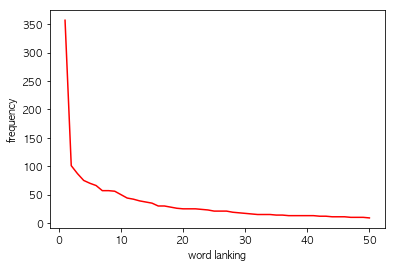

In [54]:
import matplotlib.pyplot as plt

x = range(1, len(top50)+1)
y = [token[1] for token in top50]

plt.plot(x, y, "r-")
plt.xlabel("word lanking")   # 단어의 순위
plt.ylabel("frequency")      # 단어의 빈도

Text(0, 0.5, '단어의 로그 빈도')

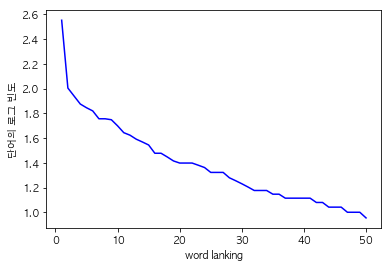

In [55]:
# log scale 확인하기
import math

# _x = [math.log10(_) for _ in x]
_y = [math.log10(_) for _ in y]

plt.plot(x, _y, "b-")
plt.xlabel("word lanking")   # 단어의 순위
plt.ylabel("단어의 로그 빈도")

#### gutenberg corpus

Text(0, 0.5, '단어의 로그 빈도')

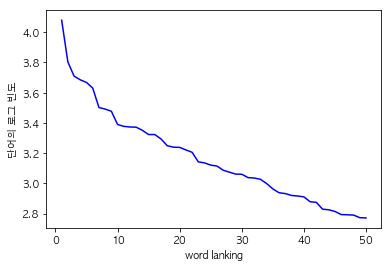

In [56]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = Text(word_tokenize(corpus))
top50 = tokens.vocab().most_common(50)

x = range(1, len(top50)+1)
y = [token[1] for token in top50]

_y = [math.log10(_) for _ in y]

plt.plot(x, _y, "b-")
plt.xlabel("word lanking")   # 단어의 순위
plt.ylabel("단어의 로그 빈도")

#### naver 뉴스 기사 corpus

Text(0, 0.5, '단어의 로그 빈도')

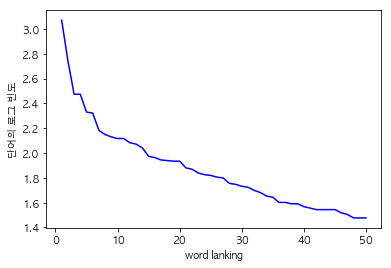

In [57]:
path = "naver_news/2019-03-19_13-08"
corpus = []
for file in [_ for _ in os.listdir(path) if _.endswith(".txt")]:
    with open("{0}/{1}".format(path, file), encoding="utf8") as fp:
        corpus.append(fp.read())
# print(corpus)

text = ""

for cor in corpus:
    text += cor + "\n"
# print(text)

tokens = Text(word_tokenize(text))
top50 = tokens.vocab().most_common(50)

x = range(1, len(top50)+1)
y = [token[1] for token in top50]

_y = [math.log10(_) for _ in y]

plt.plot(x, _y, "b-")
plt.xlabel("word lanking")   # 단어의 순위
plt.ylabel("단어의 로그 빈도")

### Heap's Law

![heaps](./images/heaps_law.png)

![heaps](./images/heaps_law2.png)

- 코퍼스가 영어일 경우 보통 상수 k는 10~100, b는 0.4~0.6 정도로 나타난다고 함

In [70]:
from konlpy.corpus import kobill

Text(0, 0.5, '고유 단어의 수')

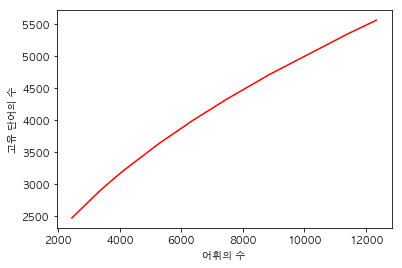

In [112]:
k = 50   # 10 - 100
b = 0.5  # 0.4 - 0.6

corpora = []
for file in kobill.fileids():
    corpora.append(kobill.open(file).read())

x = []
y = []
_x = []
_y = []

text = ""

for corpus in corpora:
    text += corpus
    tokens = Text(word_tokenize(text))
    x.append(len(tokens))
    y.append(k * len(tokens) ** b)
    _x.append(math.log10(len(tokens)))
    _y.append(math.log10(k) + math.log10(len(tokens)*b))

plt.plot(x, y, "r-")
plt.xlabel("어휘의 수")
plt.ylabel("고유 단어의 수")

Text(0, 0.5, '로그 고유 단어의 수')

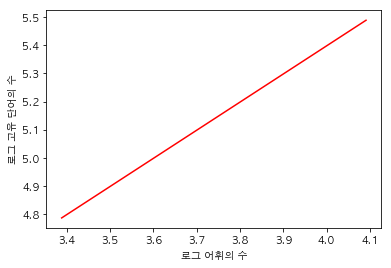

In [113]:
plt.plot(_x, _y, "r-")
plt.xlabel("로그 어휘의 수")
plt.ylabel("로그 고유 단어의 수")

Text(0, 0.5, '로그 고유 단어의 수')

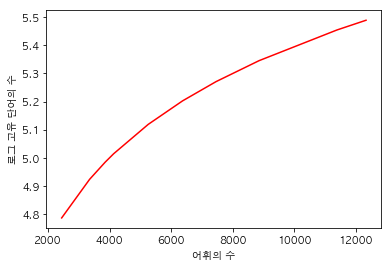

In [114]:
plt.plot(x, _y, "r-")
plt.xlabel("어휘의 수")
plt.ylabel("로그 고유 단어의 수")

Text(0, 0.5, '고유 단어의 수')

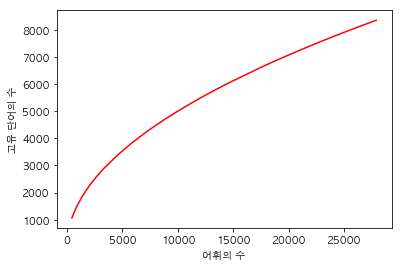

In [115]:
# naver 뉴스 기사에서 확인하기
path = "naver_news/2019-03-19_13-08"
corpora = []
for file in [_ for _ in os.listdir(path) if _.endswith(".txt")]:
    with open("{0}/{1}".format(path, file), encoding="utf8") as fp:
        corpora.append(fp.read())

x = []
y = []
_x = []
_y = []

text = ""

for corpus in corpora:
    text += corpus
    tokens = Text(word_tokenize(text))
    x.append(len(tokens))
    y.append(k * len(tokens) ** b)
    _x.append(math.log10(len(tokens)))
    _y.append(math.log10(k) + math.log10(len(tokens)*b))

plt.plot(x, y, "r-")
plt.xlabel("어휘의 수")
plt.ylabel("고유 단어의 수")

Text(0, 0.5, '로그 고유 단어의 수')

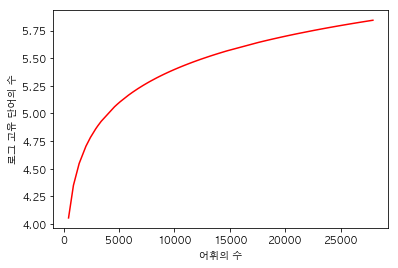

In [116]:
plt.plot(x, _y, "r-")
plt.xlabel("어휘의 수")
plt.ylabel("로그 고유 단어의 수")